# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("datasets/dogs_breed_info.csv")

In [3]:
df.head()

,index,Breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,0,Akita,26,28,80,120
1,1,Anatolian Sheepdog,27,29,100,150
2,2,Bernese Mountain Dog,23,27,85,110
3,3,Bloodhound,24,26,80,120
4,4,Borzoi,26,28,70,100


In [4]:
del df[df.columns[0]]

In [5]:
df.head()

,Breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,Akita,26,28,80,120
1,Anatolian Sheepdog,27,29,100,150
2,Bernese Mountain Dog,23,27,85,110
3,Bloodhound,24,26,80,120
4,Borzoi,26,28,70,100


### Tratamento dos Dados

In [6]:
df = df.drop(df[df['height_low_inches'] == 'not found'].index)
df = df.drop(df[df['height_low_inches'] == 'na'].index)

In [7]:
df_clustering = df.copy()

In [8]:
del df_clustering[df_clustering.columns[0]]

In [9]:
df_clustering = df_clustering.values

In [10]:
df_clustering

array([['26', '28', '80', '120'],
       ['27', '29', '100', '150'],
       ['23', '27', '85', '110'],
       ['24', '26', '80', '120'],
       ['26', '28', '70', '100'],
       ['25', '27', '100', '130'],
       ['32', '32', '120', '160'],
       ['27', '32', '95', '120'],
       ['23', '28', '130', '150'],
       ['28', '35', '90', '150'],
       ['28', '30', '70', '120'],
       ['27', '30', '175', '190'],
       ['24', '30', '100', '150'],
       ['26', '28', '100', '150'],
       ['24', '26', '65', '110'],
       ['22', '27', '90', '110'],
       ['25', '28', '110', '190'],
       ['25', '27', '50', '60'],
       ['22', '25', '65', '70'],
       ['24', '27', '100', '120'],
       ['22', '26', '60', '65'],
       ['22', '26', '60', '75'],
       ['22', '26', '60', '75'],
       ['23', '27', '50', '75'],
       ['25', '29', '80', '140'],
       ['23', '27', '75', '95'],
       ['21', '25', '65', '70'],
       ['23', '27', '74', '76'],
       ['21', '26', '55', '75'],
       ['19', '

### Scaling Data

In [11]:
scaler = StandardScaler()

In [12]:
df_clustering_scaled = scaler.fit_transform(df_clustering)

In [13]:
df_clustering_scaled

array([[ 1.25756141,  0.92750987,  1.20973268,  1.51021755],
       [ 1.413964  ,  1.059122  ,  1.86304571,  2.23795424],
       [ 0.78835362,  0.79589773,  1.37306094,  1.26763865],
       [ 0.94475622,  0.66428559,  1.20973268,  1.51021755],
       [ 1.25756141,  0.92750987,  0.88307616,  1.02505975],
       [ 1.10115881,  0.79589773,  1.86304571,  1.75279644],
       [ 2.19597698,  1.45395842,  2.51635874,  2.48053314],
       [ 1.413964  ,  1.45395842,  1.69971745,  1.51021755],
       [ 0.78835362,  0.92750987,  2.84301526,  2.23795424],
       [ 1.5703666 ,  1.84879483,  1.5363892 ,  2.23795424],
       [ 1.5703666 ,  1.19073414,  0.88307616,  1.51021755],
       [ 1.413964  ,  1.19073414,  4.31296958,  3.20826983],
       [ 0.94475622,  1.19073414,  1.86304571,  2.23795424],
       [ 1.25756141,  0.92750987,  1.86304571,  2.23795424],
       [ 0.94475622,  0.66428559,  0.71974791,  1.26763865],
       [ 0.63195103,  0.79589773,  1.5363892 ,  1.26763865],
       [ 1.10115881,  0.

## Using Knee method to find the ideal number of cluster

In [14]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_clustering_scaled)
    sse.append(kmeans.inertia_)

In [15]:
sse

[592.0,
 240.81736442221055,
 152.8945679881822,
 109.72743057983087,
 71.83500968225836,
 58.24114372454016,
 48.95818281622509,
 41.907958051281284,
 38.141469712982534,
 33.605646163391754]

In [16]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

In [17]:
kl.elbow

3

* Ideal number of clusters: `3`

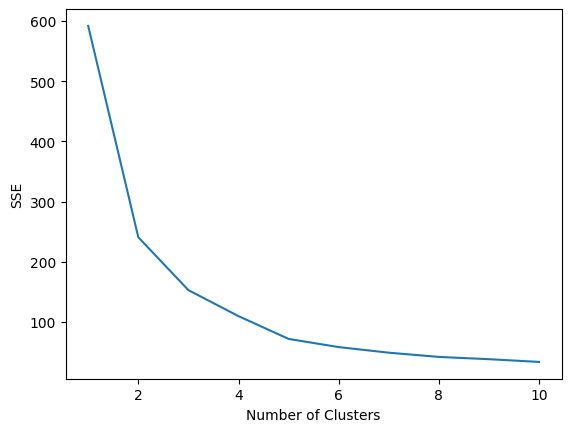

In [35]:
plt.plot(range(1, 11), sse);
plt.xlabel("Number of Clusters");
plt.ylabel("SSE");
plt.show()

## Applying Kmeans

In [18]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
   )

In [19]:
kmeans.fit(df_clustering_scaled)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [20]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

### Merge Data

In [21]:
df['cluster'] = kmeans.labels_

In [22]:
df.head(10)

,Breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,cluster
0,Akita,26,28,80,120,0
1,Anatolian Sheepdog,27,29,100,150,0
2,Bernese Mountain Dog,23,27,85,110,0
3,Bloodhound,24,26,80,120,0
4,Borzoi,26,28,70,100,0
5,Bullmastiff,25,27,100,130,0
6,Great Dane,32,32,120,160,0
7,Great Pyrenees,27,32,95,120,0
8,Great Swiss Mountain Dog,23,28,130,150,0
9,Irish Wolfhound,28,35,90,150,0


### Filter data from specific cluster

In [23]:
cluster_0 = df[df['cluster'] == 0]

In [24]:
cluster_0

,Breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,cluster
0,Akita,26,28,80,120,0
1,Anatolian Sheepdog,27,29,100,150,0
2,Bernese Mountain Dog,23,27,85,110,0
3,Bloodhound,24,26,80,120,0
4,Borzoi,26,28,70,100,0
5,Bullmastiff,25,27,100,130,0
6,Great Dane,32,32,120,160,0
7,Great Pyrenees,27,32,95,120,0
8,Great Swiss Mountain Dog,23,28,130,150,0
9,Irish Wolfhound,28,35,90,150,0


In [25]:
cluster_1 = df[df['cluster'] == 1]

In [26]:
cluster_1

,Breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,cluster
55,American Water Spaniel,15,18,25,45,1
58,Basset Hound,14,14,40,50,1
62,Bull Dog,12,16,50,60,1
67,Cocker Spaniel-American,15,16,22,28,1
68,Cocker Spaniel-English,15,17,25,35,1
...,...,...,...,...,...,...
145,Papillon,8,11,5,10,1
146,Pomeranian,12,12,3,7,1
147,Poodle Toy,10,10,10,10,1
148,Toy Fox Terrier,10,10,4,7,1
